In [13]:
import os
import numpy as np
from random import randint
import matplotlib.pyplot as plt

#### Нейройсеть
<img src="./xor_problem.png" />
1 скрытый слой с 2 нейронами

$w_{12}$ - вес 1 нейрона у 2 нейрона следующего слоя

$x_{1}$ - значение нейрона

$n_{1}$ - вход 1 нейрона в слое ($\sum_{i} w_{ji}x_{i} $)

Матрица весов первого слоя `weight_1`: $\begin{pmatrix} w_{11} & w_{12}\\ w_{21} & w_{22} \end{pmatrix}$

Базис второго слоя `bias_1`: $ \begin{pmatrix} b_{1} & b_{2}\end{pmatrix} $

Вычисление входа второго слоя: $ \begin{pmatrix} x_{1} & x_{2} \end{pmatrix} \begin{pmatrix} w_{11} & w_{12}\\ w_{21} & w_{22} \end{pmatrix} + \begin{pmatrix} b_{1} & b_{2}\end{pmatrix} = \begin{pmatrix} n_{1} & n_{2} \end{pmatrix} $

Значения второго слоя: $ \begin{pmatrix} f(n_{1}) & f(n_{2}) \end{pmatrix} = \begin{pmatrix} x_{12} & x_{22} \end{pmatrix} $

Матрица весов второго слоя `weight_2`: $\begin{pmatrix} w_{11} \\ w_{21} \end{pmatrix}$

Базис третьего слоя `bias_2`: $ \begin{pmatrix} b_{3}\end{pmatrix} $

Вычисление входа третьего слоя: $ \begin{pmatrix} x_{12} & x_{22} \end{pmatrix} \begin{pmatrix} w_{11} \\ w_{21} \end{pmatrix} + \begin{pmatrix} b_{3}\end{pmatrix} = \begin{pmatrix} n_{13}\end{pmatrix} $

Значение 3 слоя: $f(n_{13}) = x_{13}$

Ошибка сети: $ (y_{target} - x_{13}) * f'(n_{13}) = \delta_{13}$

ошибки 2 слоя: $ \delta_1^3 \circ \begin{pmatrix} w_{11} \\ w_{21} \end{pmatrix}^T \circ \begin{pmatrix} f'(n_{1}) &  f'(n_{2}) \end{pmatrix}) = \begin{pmatrix} \delta_1^2 & \delta_2^2 \end{pmatrix} $

Общая формула обратного распространения ошибки: $ \begin{pmatrix} \delta_1 & ... & \delta_n \end{pmatrix} W^T \circ \begin{pmatrix} f'(n_{1}) & ... & f'(n_{n}) \end{pmatrix} $

Изменение весов 2 слоя:  $ \ \begin{pmatrix} x_{12} & x_{22} \end{pmatrix}^T \begin{pmatrix} \delta_1^3 \end{pmatrix} = \begin{pmatrix} \Delta_{11} \\ \Delta_{12} \end{pmatrix} $

Извенения базиса 2 слоя: $ \delta_1^3  = \Delta_b $

Изменение весов 1 слоя:  $ \begin{pmatrix} x_{11} & x_{12} \end{pmatrix}^T \begin{pmatrix} \delta_1^2 & \delta_2^2 \end{pmatrix} =
\begin{pmatrix} x_{11} \\ x_{12} \end{pmatrix} \begin{pmatrix} \delta_1^2 & \delta_2^2 \end{pmatrix} = \begin{pmatrix} \Delta_{11} & \Delta_{12} \\ \Delta_{12} & \Delta_{22} \end{pmatrix}$

Извенения базисов 1 слоя: $ \begin{pmatrix} \delta_1^2 & \delta_2^2 \end{pmatrix}  = \begin{pmatrix} \Delta_{b1} & \Delta_{b2} \end{pmatrix} $

Итоговое значение весов первого слоя: $\begin{pmatrix} w_{11} & w_{12}\\ w_{21} & w_{22} \end{pmatrix} + \alpha * \begin{pmatrix} \Delta_{11} & \Delta_{12} \\ \Delta_{12} & \Delta_{22} \end{pmatrix} $, где $\alpha$ - скорость градиентного спуска

class Layer:
    def __init__(self, layer_size, prew_layer_size):
        self.layer_size = layer_size
        self.next_layer_size = next_layer_size
        weight = []
        for i in layer_size:
            line = []
            for j in next_layer_size:
                line.append(random.rand_range(-1, 1))
            weight.append(line)
        self.weight = weight
        
    def forward(prev_layer):
        neuron

In [129]:
# Функция, которую будем предсказывать:
def xor(x, y):
    return 1 if x+y != 1 else 0

# массив из данных, на которых будем обучать нейросеть
inputs = []
expected_output = []
for _ in range(256):
    x = randint(0, 1)
    y = randint(0, 1)
    inputs.append([x , y])
    expected_output.append(xor(x, y))
#     print ([x , y], '~>', xor(x, y))

inputs = np.array(inputs)
expected_output = np.array(expected_output)

# функция активации
def sigmoid(x):
    return 1.0/ (1 + np.exp(-x))

# производная от функции активации
def derivative_sigmoid(x):
    a = sigmoid(x)
    return a * (1 - a)

In [130]:
# Зададим размеры нейросети
inputLayerNeurons, hiddenLayerNeurons, outputLayerNeurons = 2,2,1

# Инициализируем веса
Weight_1 = np.random.uniform(size=(inputLayerNeurons, hiddenLayerNeurons))
Bias_1 = np.random.uniform(size=(1, hiddenLayerNeurons))
Weight_2 = np.random.uniform(size=(hiddenLayerNeurons, outputLayerNeurons))
Bias_2 = np.random.uniform(size=(1, outputLayerNeurons))

In [131]:
# код нейросети

def forward(layer_in):
    # Слой 1
    layer_hidden = layer_in.dot(Weight_1) + Bias_1
    layer_hidden_result = sigmoid(layer_hidden)

    # Слой 2
    layer_out = layer_hidden_result.dot(Weight_2) + Bias_2
    layer_out_result = sigmoid(layer_out)
    return layer_out_result

In [132]:
# Проверим, что отвечает нейросеть на первые 10 пар чисел в данных

for x_i, y_i in zip(inputs[:10], expected_output[:10]):
    print(x_i, '~~>', '%.2f' % forward(x_i), '[%d]' % y_i)

[0 0] ~~> 0.69 [1]
[1 0] ~~> 0.72 [0]
[1 0] ~~> 0.72 [0]
[0 1] ~~> 0.71 [0]
[1 0] ~~> 0.72 [0]
[1 0] ~~> 0.72 [0]
[0 1] ~~> 0.71 [0]
[1 0] ~~> 0.72 [0]
[1 1] ~~> 0.73 [1]
[0 1] ~~> 0.71 [0]


In [150]:
def backward(layer_in, target):
    #layer 1
    layer_hidden = layer_in.dot(Weight_1) + Bias_1
    layer_hidden_result = sigmoid(layer_hidden)

    # Слой 2
    layer_out = layer_hidden_result.dot(Weight_2) + Bias_2
    layer_out_result = sigmoid(layer_out)
    
    # Вычисляем ошики у каждого слоя
    loss = target - layer_out_result
    layer_out_error = loss * derivative_sigmoid(layer_out)
    hidden_layer_error = layer_out_error.dot(Weight_2.T) * derivative_sigmoid(layer_hidden)
    
    # Вычисляем изменения весов и базисов
    d_weight_1 = layer_in.T.dot(hidden_layer_error)
    # так как за раз на вход могут подать сразу массив данных, просуммируем их по оси 0,
    # чтобы получить нужный вектор изменения базисов
    d_bias_1 = np.sum(hidden_layer_error, axis=0, keepdims=True)
    d_weight_2 = layer_hidden_result.T.dot(layer_out_error)
    d_bias_2 = np.sum(layer_out_error, axis=0, keepdims=True)
    return d_weight_1, d_bias_1, d_weight_2, d_bias_2


res = backward(inputs[0], expected_output[0])
print(res)

(array([[0., 0.],
       [0., 0.]]), array([[ 0.01425601, -0.02869474]]), array([[-0.08199305],
       [-0.06904343]]), array([[-0.1128491]]))


In [153]:
loss_history = []
epochs = 5000
lr = 0.1
inputs = np.array([[[0,0]],[[0,1]],[[1,0]],[[1,1]]])
expected_output = np.array([[0],[1],[1],[0]])



for e in range(epochs):
    hist_W1.append(W1.flatten())
    hist_B1.append(B1.flatten())
    hist_W2.append(W2.flatten())
    hist_B2.append(B2.flatten())
    i=0
    batch_loss = []
    while(i<inputs.shape[0]):
        x_batch = inputs[i]
        y_batch = expected_output[i]
        i += 1
        d1w, d1b, d2w, d2b = backward(x_batch, y_batch)
        Weight_1 += lr * d1w
        Bias_1 += lr * d1b
        Weight_2 += lr * d2w
        Bias_2 += lr * d2b
        a2 = forward(x_batch)
        loss = np.linalg.norm(a2 - y_batch)
        batch_loss.append(np.linalg.norm(a2 - y_batch))
        hist_W1.append(W1.flatten())
    loss_history.append(np.mean(batch_loss))
   
    hist_B1.append(B1.flatten())
    hist_W2.append(W2.flatten())
    hist_B2.append(B2.flatten())


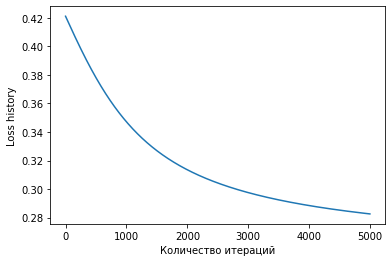

In [154]:
# plt.plot(hist_W1)
plt.plot(loss_history)
plt.ylabel('Loss history')
plt.xlabel('Количество итераций')
plt.show()

In [155]:
# Проверим, что отвечает нейросеть на первые 10 пар чисел в данных

for x_i, y_i in zip(inputs[:10], expected_output[:10]):
    print(x_i, '~~>', '%.2f' % forward(x_i), '[%d]' % y_i)

[[0 0]] ~~> 0.06 [0]
[[0 1]] ~~> 0.49 [1]
[[1 0]] ~~> 0.93 [1]
[[1 1]] ~~> 0.50 [0]
